# STAT479 Homework 1
### 4 October 2024
### Nate Talampas

# Problem 1
Explain the role of the following components in a feedforward neural network:
*************************************************

- **Neurons**: A neuron is a simple element where information processing occurs, and each layer of a feedforward neural networks are composed of computational units called neurons.
- **Weights**: Signals are passed between neurons over connection links, and each connection link has an associated weight.
- **Activation functions**: The range of the output is determined by the activation function $\phi(\cdot)$.
- **Bias**: With no input, the bias would be the pre-activation.

# Problem 2

Given the following weights and biases for a simple two-layer neural network:
- Input layer: 2 neurons
- Hidden layer: 3 neurons
- Weights from input to hidden:
$
W_1 = \begin{bmatrix}
0.2 & -0.3 & 0.4 \\
0.5 & -0.1 & -0.4
\end{bmatrix}
$
- Bias for hidden layer:
$
b_1 = \begin{bmatrix}
.1 & .2 & .3
\end{bmatrix}
$
- Activation function: $ReLU$


Calculate the output of the hidden layer for the input:
$
x = \begin{bmatrix}
.7 \\
.5
\end{bmatrix}
$
*******************************************************************************

$$a(\vec{x}) = b + \sum_i w_i x_i = b + \vec{w}^T \vec{x}$$

$$\vec{w}^T \vec{x} = \begin{bmatrix}
0.2 & 0.5 \\
-0.3 & -0.1 \\
0.4 & -0.4
\end{bmatrix}
\begin{bmatrix}
0.7 \\
0.5
\end{bmatrix}
= \begin{bmatrix}
0.39 \\
-0.26 \\
0.08
\end{bmatrix}$$

$$b + \vec{w}^T \vec{x} = $$
$$ \begin{bmatrix}
0.39 \\
-0.26 \\
0.08
\end{bmatrix} +
\begin{bmatrix}
0.1 \\
0.2 \\
-0.3
\end{bmatrix} =
\begin{bmatrix}
0.49 \\
-0.06 \\
-0.22
\end{bmatrix}$$

$$\text{ReLU activation function}: max (0, a(\vec{x})) = 0.49$$



# Problem 3
Consider a simple neural network with a single hidden layer and sigmoid activation. The output layer uses the sigmoid function. Given the following:

• Input: $x = .5$

• Target output: $y = 1$

• Weights: $w_1 = .2, w_2 = .4$

• Biases: $b_1 = .1, b_2 = .2$

Using a learning rate $\eta = .1$, perform one step of gradient descent to update the weights.
***********************************************************************************************************

$$\text{sigmoid activation function}: \sigma(x) = \frac{1}{1+e^{-x}} \rightarrow \sigma ' (x) = \sigma(x)(1 - \sigma(x))$$

$ \text{1. Forward Propagation} $
$$ z_1 = x \cdot w_1 + b_1 = 0.5 \cdot 0.2 + 0.1 = 0.2 $$
$$ a_1 = \sigma(z_1) = \frac{1}{1+e^{-0.2}} = 0.549834 $$
$$ z_2 = a_1 \cdot w_2 + b_2 = 0.549834 \cdot 0.4 + 0.2 = 0.41993 $$
$$ a_2 = \sigma(z_2) = \frac{1}{1+e^{-0.41993}} = 0.6034673 $$
$$ \hat{y} = a_2 = 0.6034673 $$

$ \text{2. Loss (binary cross entropy)} $

$$ L = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$
$$ L = -(1 \cdot \log(0.6034673) + (1 - 1) \cdot \log(1 - 0.6034673)) = 0.2193462 $$
$$\frac{\partial L}{\partial \hat{y}} = \frac{\hat{y} - y}{\hat{y} (1 - \hat{y})}  = \frac{0.6034673 - 1}{0.6034673(1-0.6034673)} = -1.657090067 $$
$\text{3. Back Propagation} \\$
$$ \frac{\partial L}{\partial z_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} = \frac{\partial L}{\partial \hat{y}} \cdot \sigma ' (z_2) $$
$$ \sigma ' (z_2) = \sigma(z_2)(1-\sigma(z_2)) = 0.239295 $$
$$\frac{\partial L}{\partial z_2} = -1.657090067 \cdot 0.239295 = -0.3965333676 $$
$$\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial w_2} = \frac{\partial L}{\partial z_2} \cdot a_1 = -0.3965333676 \cdot 0.549834 = 0.2396533368 $$
$$ \sigma ' (z_1) = \sigma(z_1) (1-\sigma(x_1)) = (0.549834)(0.450166) = 0.2475166$$
$$ \frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial z_2}{\partial a_1} = \frac{\partial L}{\partial z_2} \cdot \sigma ' (z_1) \cdot w_2 = -0.3965333676 \cdot 0.2475166 \cdot 0.5 = -0.0392594$$
$$\frac{\partial L}{\partial z_1} = - 0.0392594$$
$$ \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_1} = \frac{\partial L}{\partial z_1} \cdot x = -0.0392594 \cdot 0.5 = -0.0196297$$
$$ \frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial b_1} = \frac{\partial L}{\partial z_1} \cdot 1 = -0.0392594$$

$$w_1^{(1)} = w_1 - \eta \cdot \frac{\partial L}{\partial w_1} = 0.2 -0.1(-0.0196297) = 0.20196297$$
$$w_2^{(1)} = w_2 - \eta \cdot \frac{\partial L}{\partial w_2} = 0.4 -0.1(-0.2180275) = 0.421802752$$
$$b_1^{(1)} = b_1 - \eta \cdot \frac{\partial L}{\partial b_1} = 0.1 -0.1(-0.0392594) = 0.10392594$$
$$b_2^{(1)} = b_2 - \eta \cdot \frac{\partial L}{\partial b_2} = 0.2 -0.1(-0.3965333) = 0.23965333$$




# Problem 4
Write a Python function that simulates a single neuron. The neuron takes two 
inputs, applies a weight to each, adds a bias, and applies a ReLU activation function. Use 
the following parameters:

• Inputs: $x_1 = .5$, $x_2 = .3$

• Weights: $w_1 = .2$, $w_2 = .8$

• Bias: $b = −.1$

In [103]:
import numpy as np

def simulate_neuron(x, w, b):
    z = np.dot(x, w) + b
    
    # ReLU function
    output = np.maximum(0, z)  # ReLU returns 0 if z < 0, otherwise returns z
    
    return output

# Given parameters
x = np.array([0.5, 0.3])
w = np.array([0.2, 0.8])
b = -0.1

# Simulate the neuron
output = simulate_neuron(x, w, b)
print("Neuron Output:", output)


Neuron Output: 0.24000000000000002


# Problem 5
Write a Python function that implements forward propagation for a simple 2-layer neural network (input, hidden, and output layers) with ReLU activation in the hidden layer and sigmoid activation in the output layer. Use the following parameters:

- Input: $ \mathbf{x} = [0.7, 0.5] $
- Weights between input and hidden layer:

  $$
  \mathbf{W}_1 = \begin{pmatrix}
  0.3 & 0.5 \\
  0.7 & -0.1
  \end{pmatrix}
  $$

- Bias for hidden layer: $ \mathbf{b}_1 = [0.2, -0.4] $
- Weights between hidden and output layer:

  $$
  \mathbf{W}_2 = \begin{pmatrix} 0.6 \\ -0.2 \end{pmatrix}
  $$

- Bias for output layer: $ b_2 = 0.1 $


In [104]:
import numpy as np

x = np.array([0.7, 0.5])  # Input
W1 = np.array([[0.3, 0.5],
               [0.7, -0.1]])  # Weights between input and hidden layer
b1 = np.array([0.2, -0.4])  # Bias for hidden layer
W2 = np.array([[0.6],
               [-0.2]])  # Weights between hidden and output layer
b2 = 0.1  # Bias for output layer

# activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation function
def forward_propagation(x, W1, b1, W2, b2):
    # Hidden layer (ReLU activation)
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    
    # Output layer (Sigmoid activation)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    
    return output

# Perform forward propagation
output = forward_propagation(x, W1, b1, W2, b2)
print("Network Output:", output)


Network Output: [0.63552651]


# Problem 6
Extend the previous problem to include backpropagation. Given a true label $y = 1$, update the weights and biases using gradient descent with a learning rate of 0.01.


In [105]:
import numpy as np

# Input data
x = np.array([0.7, 0.5])  # Input
W1 = np.array([[0.3, 0.5],
               [0.7, -0.1]])  # Weights between input and hidden layer
b1 = np.array([0.2, -0.4])  # Bias for hidden layer
W2 = np.array([[0.6],
               [-0.2]])  # Weights between hidden and output layer
b2 = 0.1  # Bias for output layer
y_true = 1
eta = 0.01  # Learning rate

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward Propagation
# Hidden layer (ReLU activation)
z1 = np.dot(x, W1) + b1
a1 = relu(z1)

# Output layer (Sigmoid activation)
z2 = np.dot(a1, W2) + b2
y_pred = sigmoid(z2)

# Binary Cross-Entropy Loss
def loss_bce(y_true, y_pred):
    # Avoid log(0) by setting limits on y_pred
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss = loss_bce(y_true, y_pred)

# Calculate gradients
# Gradient of loss with respect to y_pred
dL_dyhat = (y_pred - y_true) / (y_pred * (1 - y_pred))  # derivative of the BCE loss w.r.t y_pred

# Backward propagation
# Gradient of output w.r.t z2 (using the chain rule)
dyhat_dz2 = y_pred * (1 - y_pred)  # derivative of the sigmoid activation!!!!
dL_dz2 = dL_dyhat * dyhat_dz2  # Chain rule: dL/dz2 = dL/dyhat * dyhat/dz2

# Gradient of z2 w.r.t W2 and b2
dL_dW2 = np.dot(a1.reshape(-1, 1), dL_dz2.reshape(1, -1))
dL_db2 = dL_dz2

# Gradient of L w.r.t z1
dz2_da1 = W2
dL_dz1 = np.dot(dL_dz2, dz2_da1.T) * (z1 > 0)  # ReLU gradient (for ReLU, dL/dz1 = dL/da1 * da1/dz1)

# Gradient of z1 w.r.t W1 and b1
dL_dW1 = np.dot(x.reshape(-1, 1), dL_dz1.reshape(1, -1))
dL_db1 = dL_dz1

# Update weights and biases
W1_updated = W1 - eta * dL_dW1
W2_updated = W2 - eta * dL_dW2
b1_updated = b1 - eta * dL_db1
b2_updated = b2 - eta * dL_db2

# Results
print("Updated Weights W1:\n", W1_updated)
print("Updated Weight W2:\n", W2_updated)
print("Updated Bias b1:\n", b1_updated)
print("Updated Bias b2:\n", b2_updated)


Updated Weights W1:
 [[ 0.30153079  0.5       ]
 [ 0.70109342 -0.1       ]]
Updated Weight W2:
 [[ 0.60277]
 [-0.2    ]]
Updated Bias b1:
 [ 0.20218684 -0.4       ]
Updated Bias b2:
 [0.10364473]


# Problem 7
Build a simple feedforward neural network using Keras. The network should:

• Have 2 hidden layers with 64 neurons each.

• Use ReLU as the activation function for the hidden layers.

• Use the sigmoid activation function for the output layer.

• Compile the model with binary cross-entropy loss and the Adam optimizer.

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
# First hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu', input_shape=(2,)))
# Second hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Output layer with sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

# Problem 8
Train the neural network using the Iris dataset. Preprocess the data by converting the target labels to binary (1 for class setosa, 0 for the other classes). 
Use 20% of the data for validation and train the model for 50 epochs.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Preprocess the data (binary labels)
# Convert to binary: 1 for 'setosa' (class 0), 0 for others
y_binary = np.where(y == 0, 1, 0)

# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 4: Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50


c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4352 - loss: 0.7013 - val_accuracy: 0.7333 - val_loss: 0.6009
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8202 - loss: 0.6002 - val_accuracy: 1.0000 - val_loss: 0.5102
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9619 - loss: 0.5099 - val_accuracy: 1.0000 - val_loss: 0.4292
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.4455 - val_accuracy: 1.0000 - val_loss: 0.3598
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3707 - val_accuracy: 1.0000 - val_loss: 0.3009
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3099 - val_accuracy: 1.0000 - val_loss: 0.2509
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.2604 - val_accuracy: 1.0000 - val_loss: 0.2085
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.2178 - val_accuracy: 1.0000 - val_loss: 0.1731
Epoch 9/50


# Problem 9
Evaluate the model's performance on the validation data using accuracy and plot the training and validation loss over the epochs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0037
Validation Accuracy: 1.0
Validation Loss: 0.00371847627684474


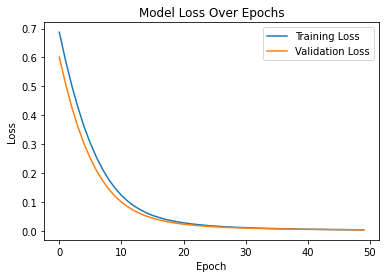

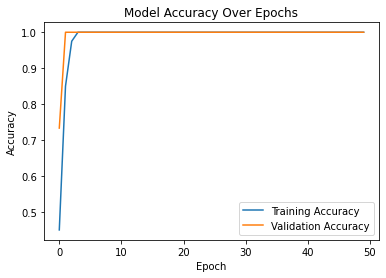

In [108]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()